In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns
import pandas as pd

In [2]:
def get_reward(arms, action):
    return np.random.normal(arms[action], 1)

def update_Q_incrementaly(Q, reward, n):
    return Q + (reward - Q) / n

In [3]:
def run_incrementaly(e, n_steps=1000, n_iters=2000):
    
    stime = time.time()
    rewards = np.zeros(n_steps)
    optimals = np.zeros(n_steps)
    iters = 0
    
    print("run e=%f"%e)
    
    while iters < n_iters:

        if iters % 100 == 0: print("%d/%d iters"%(iters, n_iters))

        steps = 0
        Qs = np.zeros(10)
        ns = np.zeros(10)
        arms = np.zeros(10)
        
        
        while steps < n_steps:
            if np.random.rand() > e: A = np.argmax(Qs) #np.random.choice(np.argwhere(Qs == np.amax(Qs)).flatten(), 1)
            else: A = np.random.randint(10)

            optimal = A == np.argmax(arms)
            
            reward = get_reward(arms, A)
            ns[A] += 1
            Qs[A] = update_Q_incrementaly(Qs[A], reward, ns[A])

            rewards[steps] += reward
            optimals[steps] += optimal
            
            steps += 1
            arms += np.random.normal(0, 0.01, 10)
            
            
        iters += 1
        
    print("done in %fs \n"%(time.time()-stime))
    return rewards/n_iters, optimals/n_iters

In [4]:
result_incremental = run_incrementaly(0.1, 5000, 2000)

run e=0.100000
0/2000 iters
100/2000 iters
200/2000 iters
300/2000 iters
400/2000 iters
500/2000 iters
600/2000 iters
700/2000 iters
800/2000 iters
900/2000 iters
1000/2000 iters
1100/2000 iters
1200/2000 iters
1300/2000 iters
1400/2000 iters
1500/2000 iters
1600/2000 iters
1700/2000 iters
1800/2000 iters
1900/2000 iters
done in 1295.911392s 



In [5]:
def run_erwa(e, n_steps=1000, n_iters=2000):
    
    stime = time.time()
    rewards = np.zeros(n_steps)
    optimals = np.zeros(n_steps)
    iters = 0
    alpha = 0.1
    alpha_list = np.array([(1-alpha)**(n_steps-i) for i in range(1, n_steps+1)])
    
    print("run e=%f"%e)

    while iters < n_iters:

        if iters % 100 == 0: print("%d/%d iters"%(iters, n_iters))

        steps = 0
        Qs = np.zeros(10)
        arms = np.zeros(10)

        while steps < n_steps:
            if np.random.rand() > e: A = np.argmax(Qs) #np.random.choice(np.argwhere(Qs == np.amax(Qs)).flatten(), 1)
            else: A = np.random.randint(10)
                
            optimal = A == np.argmax(arms)

            reward = get_reward(arms, A)
            rewards[steps] += reward
            optimals[steps] += optimal
            
            Qs[A] = Qs[A] + alpha * (reward - Qs[A])
            
            steps += 1
            arms += np.random.normal(0, 0.01, 10)
            
            
        iters += 1
        
    print("done in %fs \n"%(time.time()-stime))
    
    return rewards/n_iters, optimals/n_iters

In [6]:
result_erwa = run_erwa(0.1, 5000, 2000)

run e=0.100000
0/2000 iters
100/2000 iters
200/2000 iters
300/2000 iters
400/2000 iters
500/2000 iters
600/2000 iters
700/2000 iters
800/2000 iters
900/2000 iters
1000/2000 iters
1100/2000 iters
1200/2000 iters
1300/2000 iters
1400/2000 iters
1500/2000 iters
1600/2000 iters
1700/2000 iters
1800/2000 iters
1900/2000 iters
done in 1233.557683s 



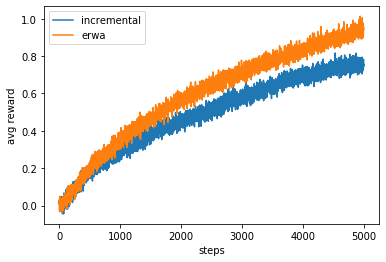

In [7]:
plt.plot(range(5000), result_incremental[0])
plt.plot(range(5000), result_erwa[0])

plt.xlabel("steps")
plt.ylabel("avg reward")
plt.legend(["incremental", "erwa"])

plt.show()

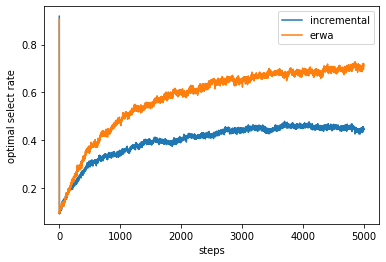

In [8]:
plt.plot(range(5000), result_incremental[1])
plt.plot(range(5000), result_erwa[1])

plt.xlabel("steps")
plt.ylabel("optimal select rate")
plt.legend(["incremental", "erwa"])

plt.show()